<a href="https://colab.research.google.com/github/te19oishi/colab/blob/main/fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>chap3</h2>


In [ ]:
!pip install simpleaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.5 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065933 sha256=5b99d7468ec652649425e8170d68ef59d77ebce43e2c5f64b5e7e23e8cd464a3
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft
import matplotlib.mlab as mlab
import scipy.signal as ss
import cis

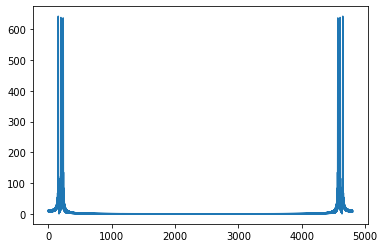

In [ ]:
y,fs=cis.wavread('domiso.wav')
plt.plot(np.abs(sfft.fft(y)))
plt.show()

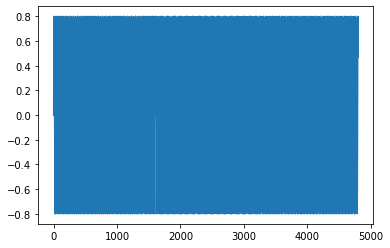

In [ ]:
y,fs=cis.wavread('domiso.wav')
plt.plot(y)
plt.show()
import IPython.display
IPython.display.Audio(y,rate=fs)

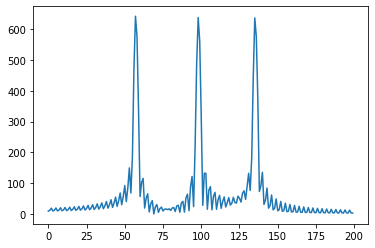

In [ ]:
y,fs=cis.wavread('domiso.wav')
yfft=np.abs(sfft.fft(y))
plt.plot(yfft[100:300])
plt.show()

In [ ]:
import IPython.display
IPython.display.Audio(y,rate=fs)

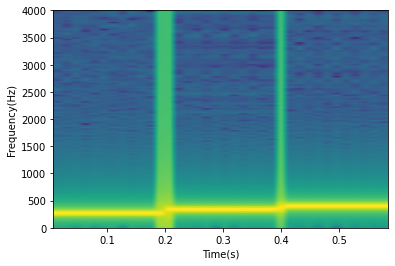

In [ ]:
plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
plt.xlabel('Time(s)')
plt.ylabel('Frequency(Hz)')
plt.show()

In [ ]:
S,F,T=mlab.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128,mode='complex',sides='twosided')
S.shape

(256, 36)

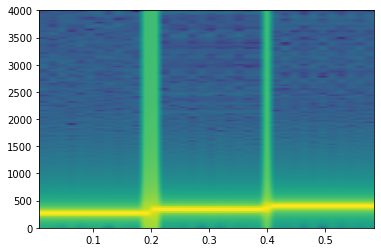

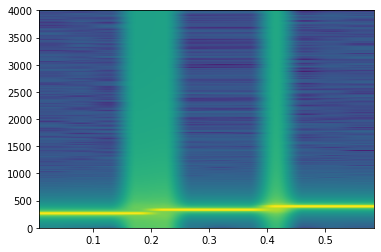

In [ ]:
plt.figure(1);P,F,T,im=plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
plt.figure(2);P,F,T,im=plt.specgram(y,Fs=fs,NFFT=512,window=np.hanning(512),noverlap=128)
plt.show()

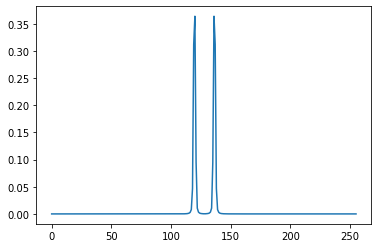

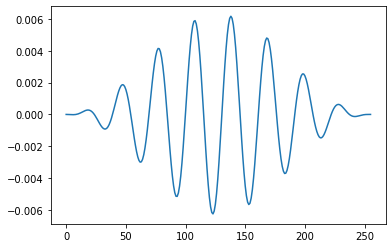

In [ ]:
S09=S[:,9]
plt.plot(np.abs(S09))
plt.show()
plt.plot(np.real(sfft.ifft(sfft.fftshift(S09))))
plt.show()

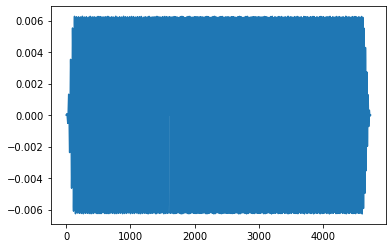

In [ ]:
# 元の音をフーリエ変換→逆フーリエ変換した時間波形と音
y,fs=cis.wavread('domiso.wav')
fftlen=256
noverlap=128
S,_,_=mlab.specgram(y,Fs=fs,NFFT=fftlen,window=np.hanning(fftlen),noverlap=noverlap,
mode='complex',sides='twosided')
slen=S.shape[1]
S=sfft.fftshift(S,axes=0)
ry=np.zeros(slen*fftlen-(slen-1)*noverlap)
k1=0
for k in range(0,slen):
  ry[k1:k1+fftlen]=ry[k1:k1+fftlen]+np.real(sfft.ifft(S[:,k]))
  k1=k1+noverlap
plt.plot(ry)
plt.show()
import IPython.display
IPython.display.Audio(ry,rate=fs)

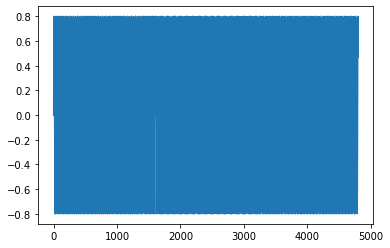

In [ ]:
#最初の音
y,fs=cis.wavread('domiso.wav')
plt.plot(y)
plt.show()
import IPython.display
IPython.display.Audio(y,rate=fs)

<h2>chap4</h2>


In [ ]:
efrref